In [1]:
import pandas as pd
data = pd.read_csv('https://media.githubusercontent.com/media/kmsuman2705/emotiondataset/master/fer2013.csv')

In [2]:
print(data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [4]:
print(data.describe())

            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000


In [5]:
print(data.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data['pixels'] = data['pixels'].apply(lambda x: np.fromstring(x, sep=' ', dtype=int))

In [8]:
pixel_data = np.stack(data['pixels'].values)

In [9]:
pixel_df = pd.DataFrame(pixel_data)
data = pd.concat([data.reset_index(drop=True), pixel_df.reset_index(drop=True)], axis=1)

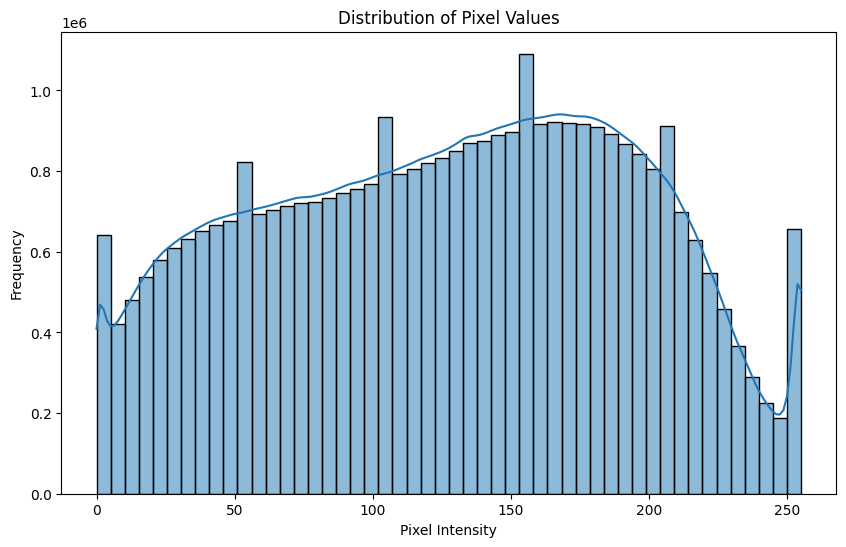

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data[pixel_df.columns[:1000]].values.flatten(), bins=50, kde=True)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


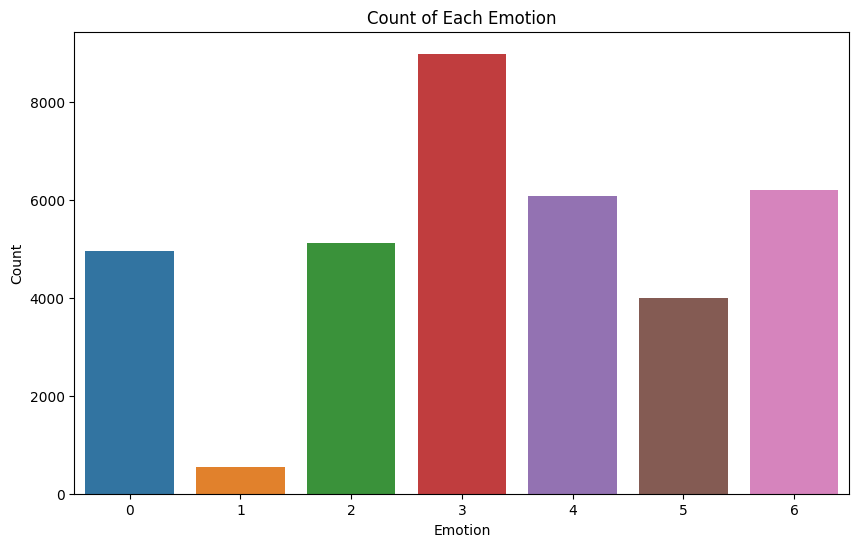

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=data)
plt.title('Count of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

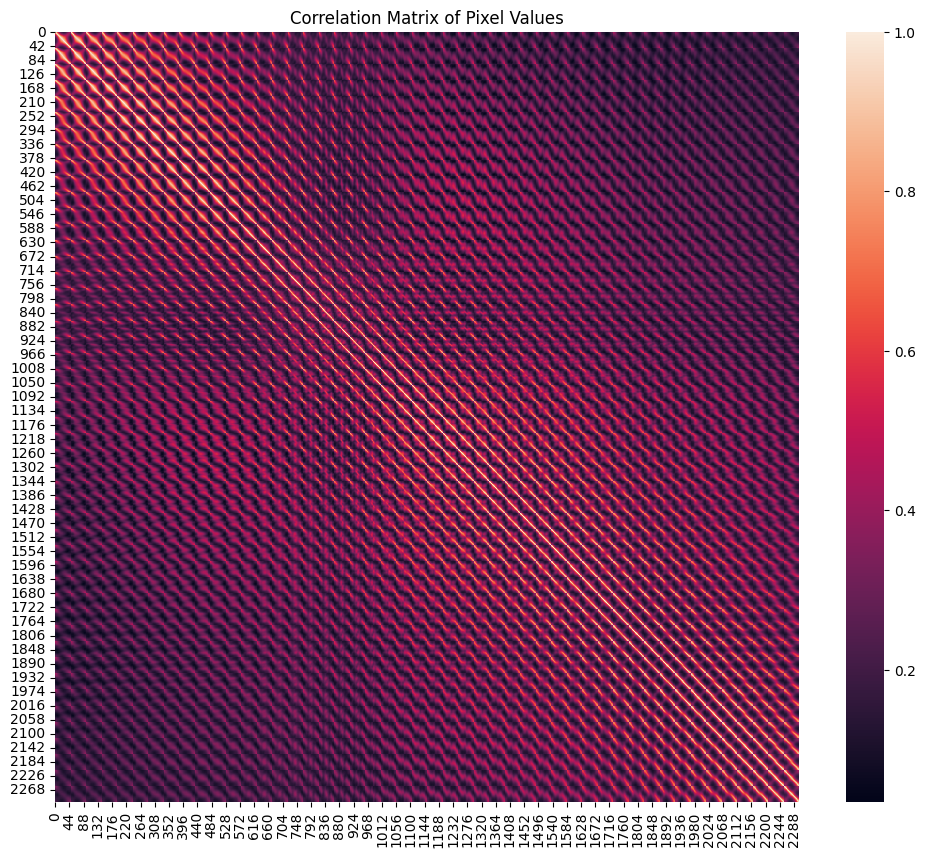

In [12]:
correlation_matrix = pixel_df.corr().abs()  # Use absolute value for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False)
plt.title('Correlation Matrix of Pixel Values')
plt.show()

In [16]:
# Assuming `data['pixels']` is a list of numpy arrays of the same shape
from sklearn.manifold import TSNE

pixel_data = np.stack(data['pixels'].values)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pixel_data)

In [18]:
# Add t-SNE results back to the DataFrame
data['tsne-one'] = tsne_results[:, 0]
data['tsne-two'] = tsne_results[:, 1]

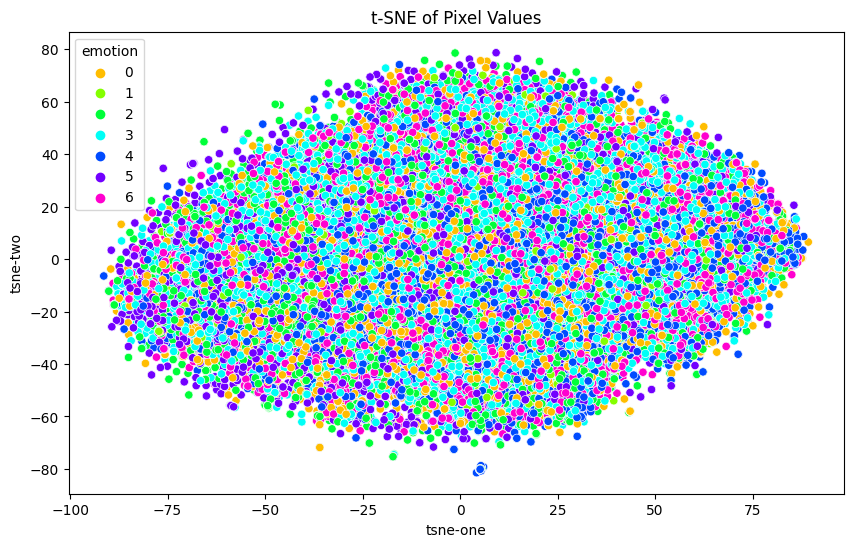

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne-one', y='tsne-two', hue='emotion', palette=sns.color_palette("hsv", 7), data=data)
plt.title('t-SNE of Pixel Values')
plt.show()